# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [8]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
validation_file = 'valid.p'
testing_file = 'test.p'


with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [9]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train =  len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape =X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
alltotal = set(y_train )
n_classes = len(alltotal )

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

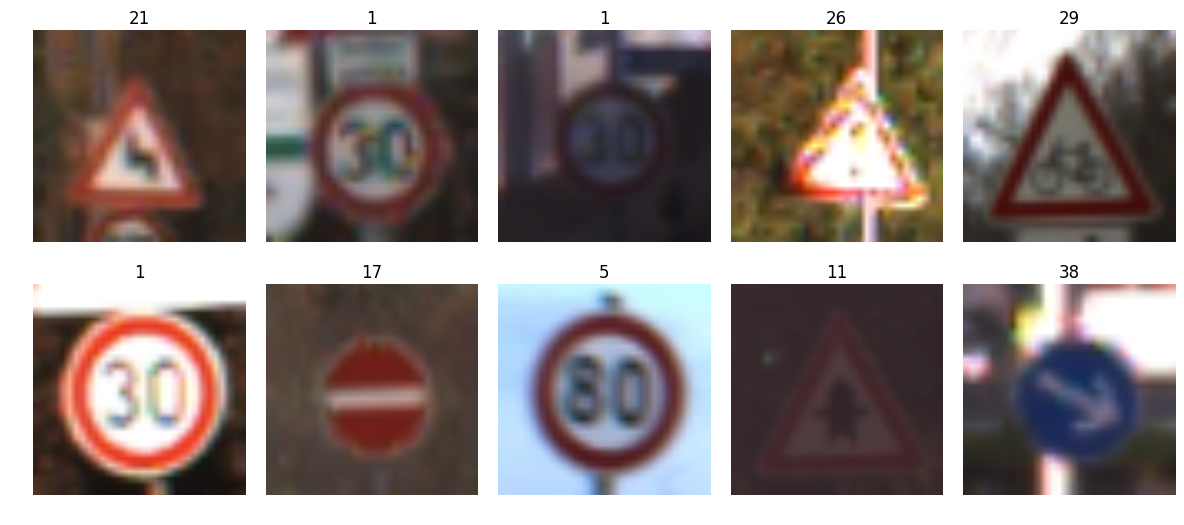

In [10]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
# Visualizations will be shown in the notebook.
%matplotlib inline

# show image of 10 random data points
fig, axs = plt.subplots(2,5, figsize=(15, 6))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
for i in range(10):
    index = random.randint(0, len(X_train))
    image = X_train[index]
    axs[i].axis('off')
    axs[i].imshow(image)
    axs[i].set_title(y_train[index])

Here is an exploratory visualization of the data set. It is a bar chart showing the frequency distribution of traffic sign respect to the classes

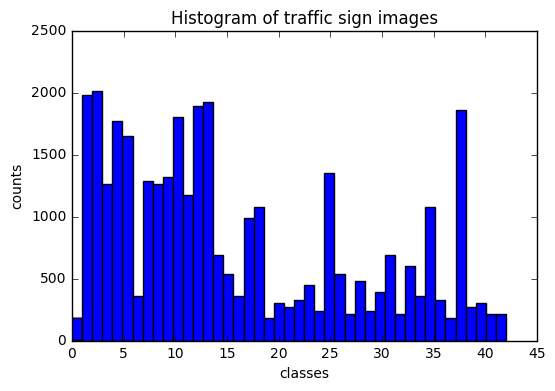

In [11]:
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
# Visualizations will be shown in the notebook.
%matplotlib inline

fig, ax = plt.subplots()
ind = np.arange(n_classes)

n, bins, patches = ax.hist(y_train, n_classes)
ax.set_xlabel('classes')
ax.set_ylabel('counts')
ax.set_title(r'Histogram of traffic sign images')
#p1 = ax.bar(ind,0,width,color='r',bottom=0,yerr=0)
plt.show()

I used the python library to calculate summary statistics of the traffic
signs data set:

* The size of training set is 34799
* The size of test set is 12630
* The shape of a traffic sign image is (32, 32, 3)
* The number of unique classes/labels in the data set is 43

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

(34799, 32, 32, 3)
(34799, 32, 32)
(12630, 32, 32, 3)
(12630, 32, 32)
(4410, 32, 32, 3)
(4410, 32, 32)


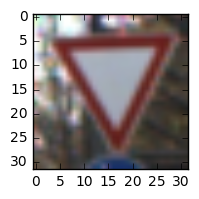

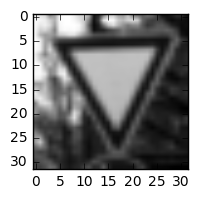

In [12]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.
import cv2
from sklearn.model_selection import train_test_split 
from sklearn.utils import shuffle
from skimage.color import rgb2gray
import numpy as np

def rotate(image, angle):
    
    # grab the dimensions of the image and calculate the center
    # of the image
    (h, w) = image.shape[:2]
    center = (w / 2, h / 2)

    # rotate the image by 180 degrees
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    return cv2.warpAffine(image, M, (w, h))

def normalize(img):
    return cv2.normalize(img, img, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    
#def normalize(img):
#    return ((img - np.min(img)) * 255.) / ( np.max(img) - np.min(img)) 

def grayscale(img):
    #COLOR_BGR2GRAY COLOR_RGB2GRAY
    return rgb2gray(img)
    #return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    #return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  

def setgrayscale(images):
    #from rgb to gray
    print(images.shape)
    result = np.zeros(shape=(len(images),32,32))
    for i in range(len(images)): 
        #gray = np.resize(grayscale(images[i]), (32, 32, 1))
        gray_img = grayscale(images[i])
        img_normalized = normalize(gray_img)
        result[i] = gray_img
    print(result.shape)
    return result

#for i in range(1000):
    #print(i)
#    np.append(X_train,(rotate(X_train[i],90)))

X_traingray = setgrayscale(X_train)
X_testgray = setgrayscale(X_test)
X_validationgray = setgrayscale(X_valid)

index = random.randint(0, len(X_traingray))

image = X_train[index]
plt.figure(figsize=(2,2))
plt.imshow(image)

image = X_traingray[index]
plt.figure(figsize=(2,2))
plt.imshow(image,cmap="Greys_r")


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**
As a first step, I decided to convert the images to grayscale because the classifier perform better working with only one parameter. As a last step, I normalized the image data because to avoid gradient oscillatin due to the different distributions due of features value.



In [13]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

The data is divided into training set and validation set, which is generated by train_test_split function of sklearn, where the training set is 80% and the verification set is 20%.
To cross validate my model, I randomly split the training data into training set and validation set. I did this by using train_test_split function that split the input sets in random subsets with size 80/20 of the input.

My final training set had 27839 number of images. My validation set and test set had 6960 and 12630 number of images.



In [14]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

X_traingray, X_validationgray, y_train, y_validation = train_test_split(X_traingray, y_train, test_size=0.2, random_state=0)
#print("Updated Image Shape: {}".format(X_train[0].shape))  

X_traingray, y_train = shuffle(X_traingray, y_train)

print(X_traingray.shape)
print(X_validationgray.shape)
print(y_train.shape)
print(y_validation.shape)


from tensorflow.contrib.layers import flatten
import tensorflow as tf

EPOCHS = 15
BATCH_SIZE = 128

# tf Graph input
x = tf.placeholder(tf.float32,(None, 32, 32))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32) #dropout (keep probability)
one_hot_y = tf.one_hot(y,43)

(27839, 32, 32)
(6960, 32, 32)
(27839,)
(6960,)


In [15]:



def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.075
    
    # Reshape input picture
    x = tf.reshape(x, shape=[-1, 32, 32, 1])
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    
    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    
    # Apply Dropout
    #fc2 = tf.nn.dropout(fc2, keep_prob) # Apply Dropout

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))    
    logits = tf.matmul(fc2, fc3_W) + fc3_b
 
    return logits



### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

 My final architecture is single CNN with four hidden layers. 
A CNN consists of a succession of convolutional and maxpooling layers, and each layer only receives connections from its previous layer. The last layer is a fully connected layer with one ouput unit per class in the recognition task.

| Layer         		|     Description	        					| 
|:---------------------:|:---------------------------------------------:| 
| Input         		| 32x32x1 grayscale image   					| 
| Convolution 5x5     	| 1x1 stride, same padding, outputs 28x28x6 	|
| RELU					|												|
| Max pooling	      	| 2x2 stride, outputs 14x14x6  				    |
| Convolution 5x5	    | 1x1 strinde, outputs 10x10x16        		    |
| Max pooling	      	| 2x2 stride, outputs 5x5x16  				    |
| Flatten               | outputs 400                                   |
| Fully connected		| output = 120     								|
| RELU					|												|
| Fully connected		| output = 84     								|
| RELU					|												|
| Fully connected		| output = 43     								|
  
  


In [16]:
### Train your model here.
### Feel free to use as many code cells as needed.
#x is a placeholder for a batch of input images. y is a placeholder for a batch of output labels.
rate = 0.01

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

### Calculate and report the accuracy on the training and validation set.
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: .8})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples



In [17]:
### Once a final model architecture is selected, 
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_traingray)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_traingray, y_train = shuffle(X_traingray, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_traingray[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: .8})
            
        validation_accuracy = evaluate(X_validationgray, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        training_accuracy = evaluate(X_traingray, y_train)
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")
    
### the accuracy on the test set should be calculated and reported as well.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_testgray, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    training_accuracy = evaluate(X_traingray, y_train)
    print("Training Accuracy = {:.3f}".format(training_accuracy))
### Feel free to use as many code cells as needed.

Training...

EPOCH 1 ...
Validation Accuracy = 0.736
Training Accuracy = 0.742

EPOCH 2 ...
Validation Accuracy = 0.888
Training Accuracy = 0.899

EPOCH 3 ...
Validation Accuracy = 0.912
Training Accuracy = 0.922

EPOCH 4 ...
Validation Accuracy = 0.924
Training Accuracy = 0.938

EPOCH 5 ...
Validation Accuracy = 0.931
Training Accuracy = 0.946

EPOCH 6 ...
Validation Accuracy = 0.935
Training Accuracy = 0.949

EPOCH 7 ...
Validation Accuracy = 0.917
Training Accuracy = 0.930

EPOCH 8 ...
Validation Accuracy = 0.946
Training Accuracy = 0.962

EPOCH 9 ...
Validation Accuracy = 0.938
Training Accuracy = 0.952

EPOCH 10 ...
Validation Accuracy = 0.949
Training Accuracy = 0.962

EPOCH 11 ...
Validation Accuracy = 0.946
Training Accuracy = 0.964

EPOCH 12 ...
Validation Accuracy = 0.945
Training Accuracy = 0.959

EPOCH 13 ...
Validation Accuracy = 0.949
Training Accuracy = 0.968

EPOCH 14 ...
Validation Accuracy = 0.960
Training Accuracy = 0.975

EPOCH 15 ...
Validation Accuracy = 0.953
Tra

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

To train the model, I used 15 epochs at the beginning of each epoch I shuffle the data in order to avoid the biases due to the position of the images.
I inizialize the variable of tensorflow, and I break training data into batches and train the model on each batch. At the end of each epoch I evaluate the model on our validation data.

The optimizer in order to minimize the loss function is a stochastic gradient descend (SGD) algorithm called Adam, that estimate the loss over small subset of data (batches).
I used a batch size of 128 images for a total of 218 iteraction to complete an epoch.

The value of hiperparameter learning rate that I use is 0.01. 





### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

I modeled the lenet-5 architecture, used convolutional neural networks to train models, used validation in training overshoots to verify the accuracy of training results, used one-hot coding in training, and cross entropy as loss function.

My final model results were:
* training set accuracy of 0.972
* validation set accuracy of 0.953
* test set accuracy of 0.880

If an iterative approach was chosen:
* What was the first architecture that was tried and why was it chosen?

The architecture that I choise for resolve the problem of image classification is the LeNet  architecture a Convolutional Neural Network.

* What were some problems with the initial architecture?

There were some problems in tuning of the parameters and in the configuration of input and output dimensions of each layear.

* How was the architecture adjusted and why was it adjusted? Typical adjustments could include choosing a different model architecture, adding or taking away layers (pooling, dropout, convolution, etc), using an activation function or changing the activation function. One common justification for adjusting an architecture would be due to over fitting or under fitting. A high accuracy on the training set but low accuracy on the validation set indicates over fitting; a low accuracy on both sets indicates under fitting.

The activation fuction used is ReLu function. I tried to add a dropout layer in order to avoid overfitting 

* Which parameters were tuned? How were they adjusted and why?

I tuned the mu = 0 and sigma = 0.1. I adapted the shape of weight and bias vector in each layer. I reshape the input image to make dimensionally consisten with weight matrix. I set the final filter depth to 43. I try different learning rate and I found that 0.01 work well.

* What are some of the important design choices and why were they chosen? For example, why might a convolution layer work well with this problem? How might a dropout layer help with creating a successful model?

The important design choices are: 
the choices of CNN wiht LeNet
the conversion of the images to grayscale reducing the network filter to make a more easy classification,
the max pooling layer 


If a well known architecture was chosen:
* What architecture was chosen?
The LeNet architecture 

* Why did you believe it would be relevant to the traffic sign application?
The LeNet architecture is a CNN and it is relevant to traffic sign application because it is an image classification problem

* How does the final model's accuracy on the training, validation and test set provide evidence that the model is working well?
The final accurancy of the test set is 89%. In order to estimate how well the model has been trained I look to the validation accurancy and in the 15 epochs is 95%. The training accurancy is comparable with the validation accurancy and at is 97%
 

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



./image/image1.jpeg
./image/image2.jpeg
./image/image3.jpeg
./image/image4.jpeg
./image/image5.jpeg


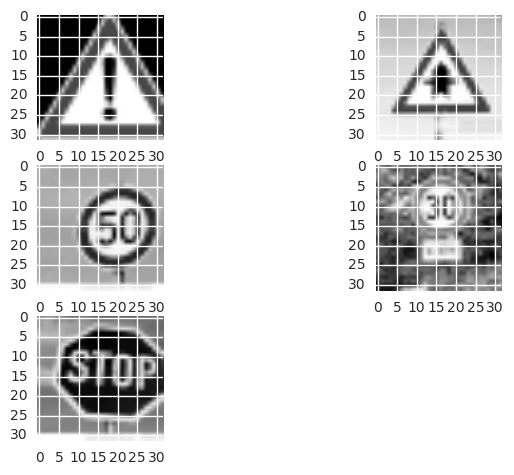

In [24]:
### Answer:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2


def loadImage(path):
    print(path)
    image = mpimg.imread(path)
    image = grayscale(image)
    image = normalize(image)
    minimun = np.minimum(image.shape[0], image.shape[1])
    cropped = image[0:minimun, 0:minimun]
    image = cv2.resize(cropped, (32,32), interpolation = cv2.INTER_AREA)
    return image

# Load an color image in grayscale
def loadImages(num):
    result = []
    f = plt.figure()
    for i in range(1,num+1):
        image = loadImage('./image/image' + str(i) + '.jpeg')
        f.add_subplot(3, 2, i) 
        plt.imshow(image,cmap="Greys_r")  
        result.append(image)
    return result
    
#[loadImage('./image/image1.jpeg'),loadImage('./image/image2.jpeg')]
X_data=np.array(loadImages(5))
y_labels=np.array([18,11,2,1,14])

# if you wanted to show a single color channel image called 'gray', for example


In [20]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
#input_array =  tf.placeholder(tf.float32,(None, 32, 32))
#logits = LeNet(input_array)

softmax = tf.nn.softmax(logits)
pred = tf.nn.top_k(softmax, 5)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, tf.train.latest_checkpoint('.'))
   
    result = sess.run(pred, feed_dict={x: X_data, keep_prob: .8})
    webaccuracy = evaluate(X_data, y_labels)

    #predicted_logits = sess.run(logits, feed_dict={x:X_data, keep_prob:1})
    #predicted_labels = np.argmax(predicted_logits, axis=1)
   
    predicted_labels= result.indices
    predictions  = result.values

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


Here are the results of the prediction:

| Image			                        |     Prediction	        					| 
|:-------------------------------------:|:---------------------------------------------:| 
| General caution    		            | Bicycles crossing  	                        | 
| Right-of-way at the next intersection | Right-of-way at the next intersection			|
| Speed limit (50km/h)				    | Speed limit (30km/h)      				    |
| Speed limit (30km/h)	      	        | Road work				                        |
| Stop		                            | Stop                	            	        |


The model was able to correctly guess 1 of the 5 traffic signs, which gives an accuracy of 20%. 
The last three images are a bit distorted during the automatic process of resizing and cropping.

In [21]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
#prediction_accurancy = np.count_nonzero(y_labels==predicted_labels[:,0:1]) / len(y_labels)
        
#print("Prediction Accuracy = ", prediction_accurancy)
print(predicted_labels[:,0:])
print(y_labels)
print(webaccuracy)
print(predictions)

[[11  1 18 38 23]
 [11 27 31 23 20]
 [16  5 13  0  1]
 [24 26 27 30 23]
 [38 14 34 36 13]]
[18 11  2  1 14]
0.20000000298
[[  9.99839067e-01   1.30814995e-04   2.27985856e-05   6.61602007e-06
    3.21718005e-07]
 [  9.99999881e-01   9.45523198e-08   4.14055901e-09   2.94150371e-10
    5.40347237e-12]
 [  9.18495178e-01   3.13883871e-02   1.45358834e-02   1.38539970e-02
    5.34654595e-03]
 [  9.93786693e-01   5.67807816e-03   4.83545329e-04   2.24858632e-05
    1.94652930e-05]
 [  9.64864492e-01   3.43983658e-02   7.32193119e-04   4.44199213e-06
    2.46364294e-07]]


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

TopKV2(values=array([[  9.99839067e-01,   1.30814995e-04,   2.27985856e-05,
          6.61602007e-06,   3.21718005e-07],
       [  9.99999881e-01,   9.45523198e-08,   4.14055901e-09,
          2.94150371e-10,   5.40347237e-12],
       [  9.18495178e-01,   3.13883871e-02,   1.45358834e-02,
          1.38539970e-02,   5.34654595e-03],
       [  9.93786693e-01,   5.67807816e-03,   4.83545329e-04,
          2.24858632e-05,   1.94652930e-05],
       [  9.64864492e-01,   3.43983658e-02,   7.32193119e-04,
          4.44199213e-06,   2.46364294e-07]], dtype=float32), indices=array([[11,  1, 18, 38, 23],
       [11, 27, 31, 23, 20],
       [16,  5, 13,  0,  1],
       [24, 26, 27, 30, 23],
       [38, 14, 34, 36, 13]]))
Predicted class 11 | True class 18


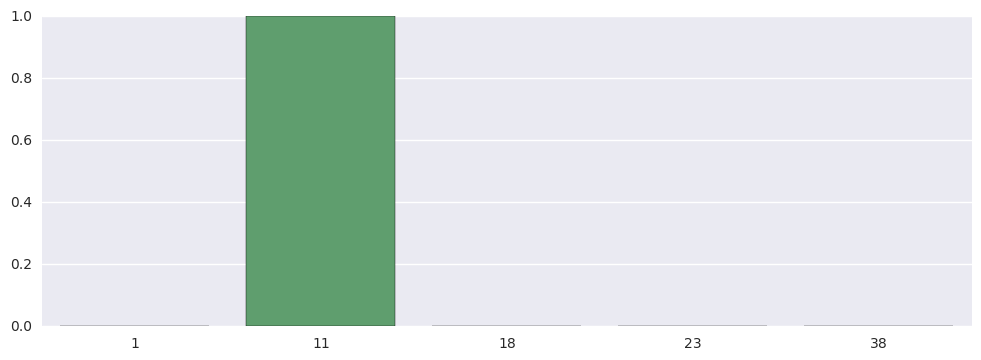

Predicted class 11 | True class 11


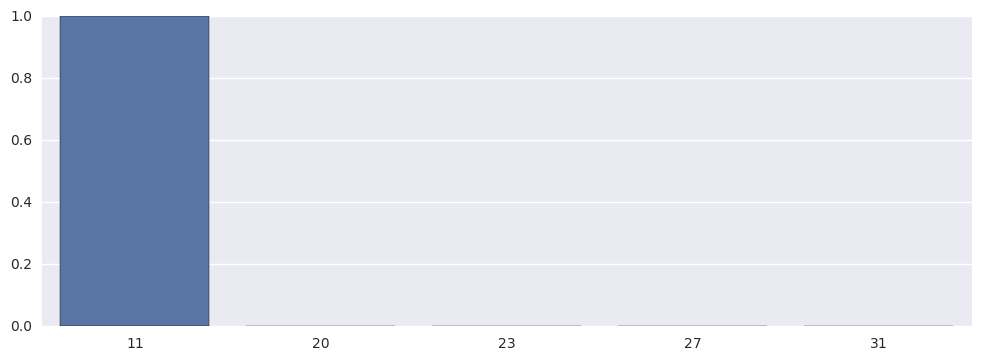

Predicted class 16 | True class 2


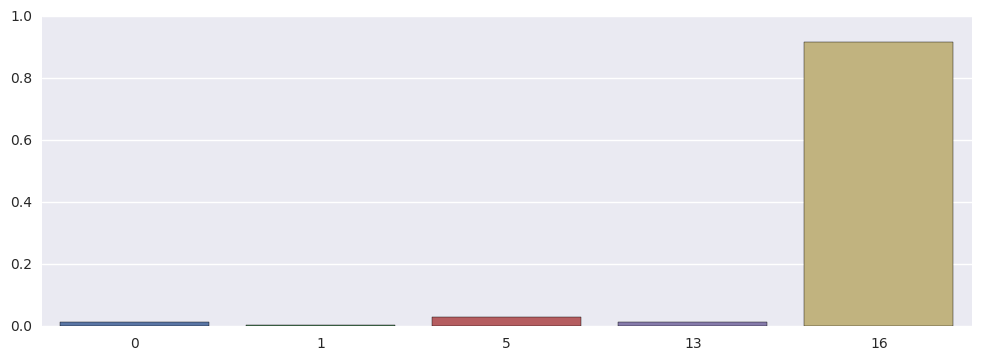

Predicted class 24 | True class 1


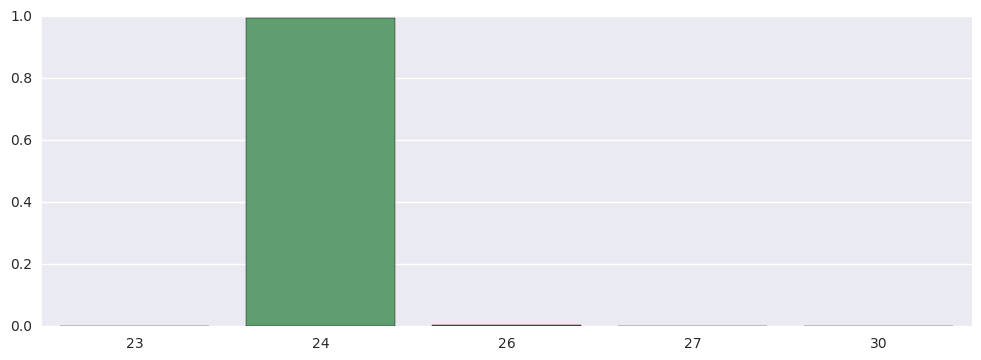

Predicted class 38 | True class 14


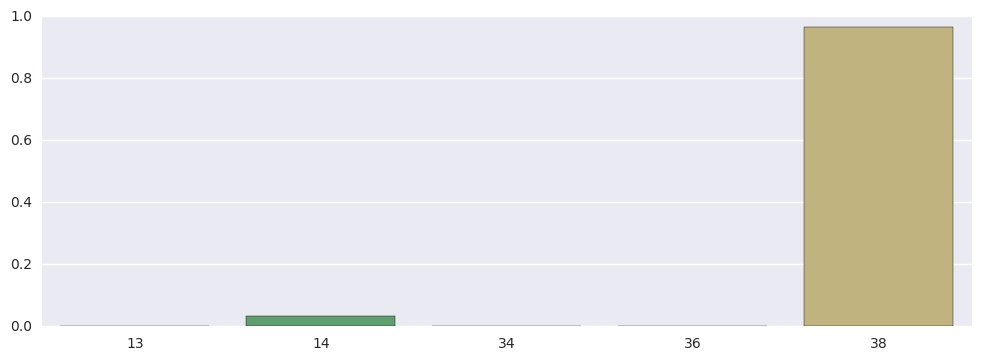

In [22]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
import seaborn as sns
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    predicted_logits = sess.run(tf.nn.top_k(softmax, k=5), feed_dict={x:X_data, keep_prob: .8})
    print(predicted_logits)
    
for i in range(5):
    print("Predicted class {} | True class {}".format(predicted_logits[1][i][0], y_labels[i]))
    fing = plt.figure(figsize = (12,4))
    sns.barplot(x=predicted_logits[1][i], y=predicted_logits[0][i])
    plt.show()

In [23]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

**Answer:**

The model is incorrect in its initial prediction, incorrectly does not appear in the first K arrays, and the correct prediction appears in the first k arrays.


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.